<a href="https://colab.research.google.com/github/Sanjay05-coder/FB-Prophet-Airline-Passenger-Forecasting/blob/main/FB_Prophet_Airline_Passenger_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import prophet
from prophet import Prophet
import numpy as np
import pandas as pd

In [14]:
df=pd.read_csv('/content/airline-passengers.csv')

In [15]:
df

,month,total_passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
#creating and fiting the model
model=Prophet() #calling the model
df = df.rename(columns={'month': 'ds', 'total_passengers': 'y'}) # Rename columns
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdt2cvpgz/uu011fzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdt2cvpgz/cxirtwim.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78995', 'data', 'file=/tmp/tmpdt2cvpgz/uu011fzw.json', 'init=/tmp/tmpdt2cvpgz/cxirtwim.json', 'output', 'file=/tmp/tmpdt2cvpgz/prophet_modelwukkqi39/prophet_model-20250921091244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:12:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future=model.make_future_dataframe(periods=30)

forecast=model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,56.791356,114.849178,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,52.428831,107.897732,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,80.117093,140.273500,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.750231,136.454297,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.057354,138.589174,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1960-12-27,487.462684,412.510017,468.467854,487.462684,487.462684,-47.590045,-47.590045,-47.590045,-47.590045,-47.590045,-47.590045,0.0,0.0,0.0,439.872639
170,1960-12-28,487.563705,416.069956,475.013162,487.563705,487.563705,-41.679601,-41.679601,-41.679601,-41.679601,-41.679601,-41.679601,0.0,0.0,0.0,445.884104
171,1960-12-29,487.664726,422.594135,482.104838,487.664726,487.664726,-35.984925,-35.984925,-35.984925,-35.984925,-35.984925,-35.984925,0.0,0.0,0.0,451.679801
172,1960-12-30,487.765747,428.594104,484.743857,487.765747,487.765747,-30.629959,-30.629959,-30.629959,-30.629959,-30.629959,-30.629959,0.0,0.0,0.0,457.135787


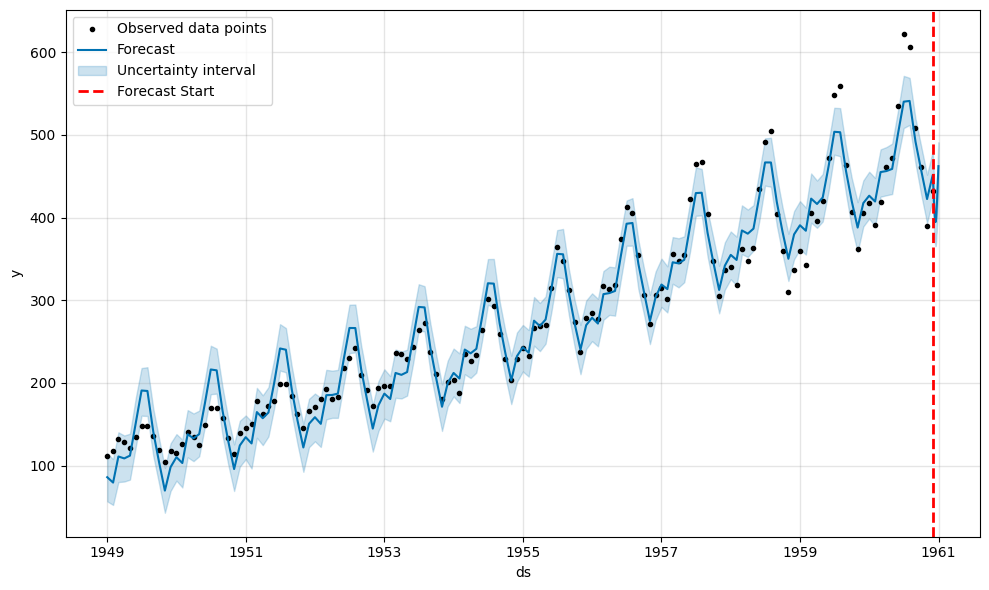

In [22]:
import matplotlib.pyplot as plt

#plot with prophet
fig=model.plot(forecast)

# adding a vertical line at forecast start

train_end=pd.to_datetime(df['ds'].max()) # last date in training data


plt.axvline(x=train_end,color='red',linestyle='--',linewidth=2,label='Forecast Start')
plt.legend()
plt.show()

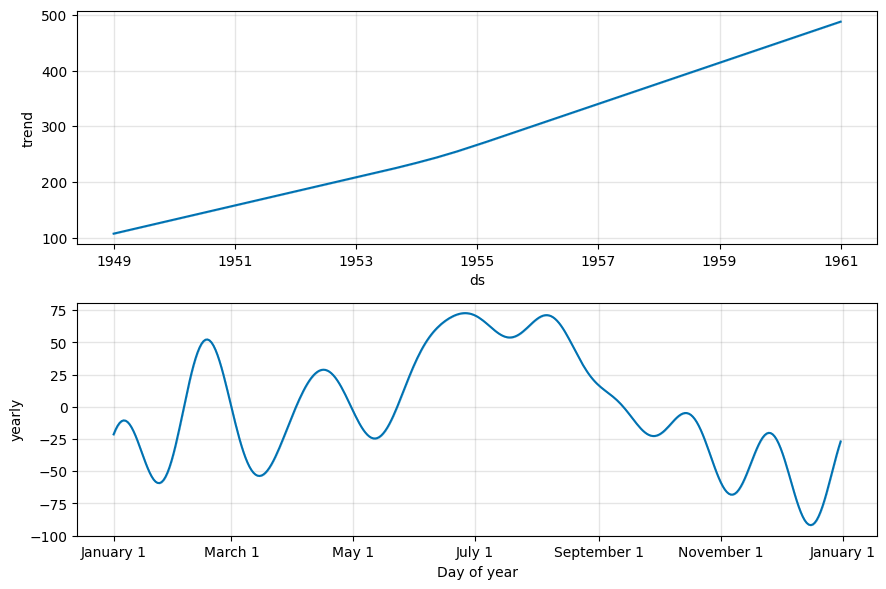

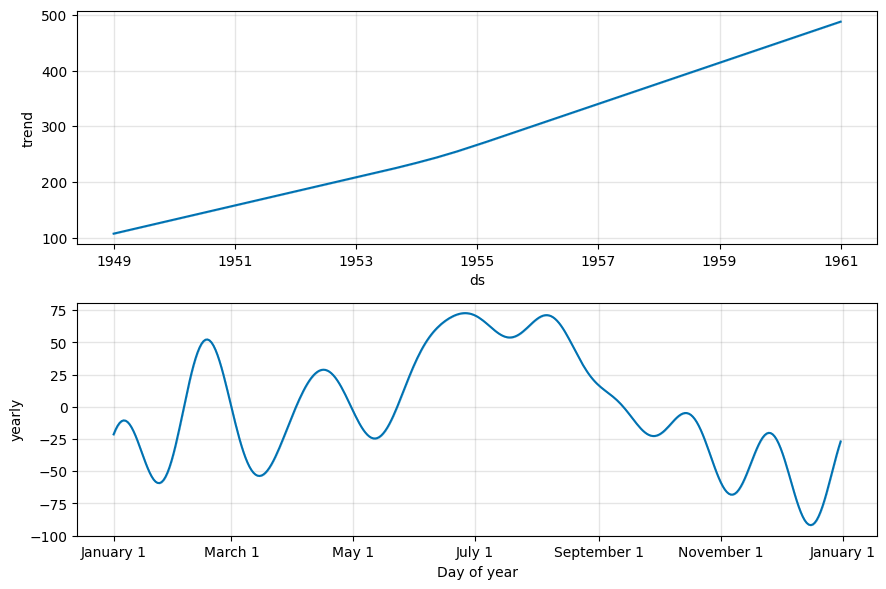

In [23]:
fig_component=model.plot_components(forecast)

fig_component